# Linear regression: Salary prediction
This notebook show the prediction of the salary related with the years of experience in the field, was performed using linear regression algorithm.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import machine_learning_fundamentals.utils.paths as path
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #to divide the data
from sklearn import preprocessing

In [3]:
## getting the data
data_file = path.data_raw_dir('salarios.csv')
dataset = pd.read_csv(data_file)
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [4]:
dataset.shape

(30, 2)

In [5]:
#we split each dimension
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
type(y)

numpy.ndarray

In [6]:
#we split the trainig and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
# we create and train the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

### Graph for the trainig set

In [8]:
import machine_learning_fundamentals.visualization.visualize as visualize

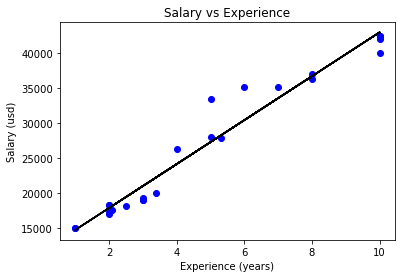

In [9]:
visualize.salary_experience_series(X_train, Y_train, regressor)

#### Graph for the validation test

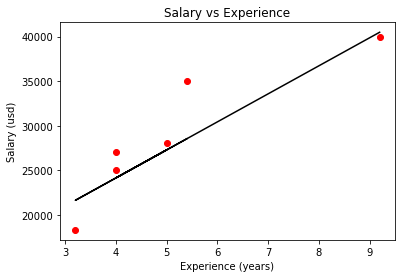

In [10]:
visualize.validation_graph(X_test, Y_test, regressor)

#### validation: means in this case that 0.78 that in the 78% values predict will be correct.

In [11]:
#validation
regressor.score(X_test, Y_test)

0.7862437374732997

## Challenge: linear regression
For this challenge you have to create the same dataset but with another columns representing the country and make the linear regression and checking if there is any relation between the salary and the country.

#### Data manage

In [12]:
countries = ['EC','CO','BR','MX'] # countries

#label encoder to change countries in numbers
encoder = preprocessing.LabelEncoder()
countries_encoded = encoder.fit_transform(countries)

#create 30 elements for the dataset
countries_elements = [random.choice(countries_encoded) for i in range(len(dataset))]
dataset['countries'] = countries_elements


#### Regression

In [13]:
#data split
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

#split for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [14]:
#train the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

#### Graph for the training set


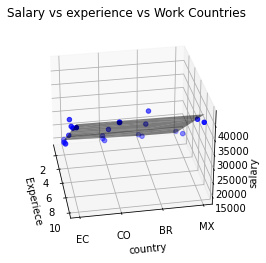

In [19]:
visualize.trainig_graph(X_train, Y_train, regressor, countries_encoded, encoder)

#### Graph for the testing set


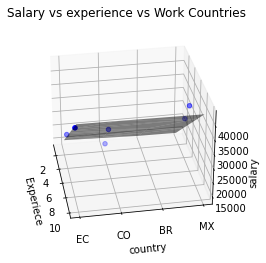

In [20]:
visualize.testing_graph(X_test, X_train, Y_test, regressor, countries_encoded, encoder)